# Importing and reading the data

In [4]:
import pandas as pd
import numpy as np

#read the train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("#########################")

#check the shape of the data
print(train.shape)
print("##########################")
print(test.shape)

print("#########################")

#check the data types of the columns
print(train.dtypes)
print("##########################")
print(test.dtypes)
movies = pd.read_csv('movies.csv')

#########################
(162758, 5)
##########################
(55315, 4)
#########################
movieid               object
reviewerName          object
isFrequentReviewer      bool
reviewText            object
sentiment             object
dtype: object
##########################
movieid         object
reviewerName    object
isTopCritic       bool
reviewText      object
dtype: object


In [5]:
#import numpy as np
#import pandas as pd
#
#test = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
#train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
#movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Function to generate the submission file**

In [7]:
#function that will be used to generate a submission file
def generate_submission_file(y_pred):
    data = {'id': [j for j in range(0, len(y_pred))], 'sentiment': y_pred}
    df = pd.DataFrame(data)
    df.to_csv('submission.csv', index=False)

# **Preparing a Dummy Classfier**

The dummy classifier will predict the most frequent sentiment, this will be helpful to judge the performace of all other models by acting as a yardstick

In [8]:
dcf = DummyClassifier(strategy='most_frequent')
y, X = train['sentiment'], train.iloc[:,:-1]


In [9]:
dcf.fit(X,y)
y_pred = dcf.predict(test)

In [10]:
data = {'id': [j for j in range(0,len(y_pred))] , 'sentiment': y_pred}
df = pd.DataFrame(data)

df.to_csv('submission.csv', index=False)

# Data Exploring

**The goal of this section to:**
1. Explore and understand train, test and movies
1. Identifying null values, to make the decision to remove it or impute it
1. Prelimnary data cleaning: Removing completely duplicated rows

In [11]:


print("#########################")

#check the shape of the data
print(train.shape)
print("##########################")
print(test.shape)

print("#########################")

#check the data types of the columns
print(train.dtypes)
print("##########################")
print(test.dtypes)

#########################
(162758, 5)
##########################
(55315, 4)
#########################
movieid               object
reviewerName          object
isFrequentReviewer      bool
reviewText            object
sentiment             object
dtype: object
##########################
movieid         object
reviewerName    object
isTopCritic       bool
reviewText      object
dtype: object


In [12]:
test[test['reviewText'].isnull()]


,movieid,reviewerName,isTopCritic,reviewText
17,captain_america_annie_hall,Mrs. Lori Lopez MD,False,NaN
29,dragon_jack_torrance,John Mccullough,True,NaN
46,whirlwind_indiana_jones_captain_jack_sparrow_r...,Mr. Paul Conley PhD,False,NaN
69,princess_leia_hannibal_lecter_t-800_wondrous,Sherri Morrison,False,NaN
71,hermione_granger_crystal_gandalf_the_grey,Brianna Farley,False,NaN
...,...,...,...,...
55163,frodo_baggins_mystery_wanderer,Lindsey Chang,False,NaN
55172,kingdom_magician,Taylor Abbott,False,NaN
55195,darth_vader_captain_america_sherlock_holmes_sc...,Bryan Phillips,True,NaN
55218,escape_the_terminator_tyler_durden_astonish,Marcus Lopez DVM,False,NaN


In [13]:
test.isnull().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [14]:
movies.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [15]:
#now we explore the data
#check the distribution of the target variable
train['sentiment'].value_counts()


sentiment
POSITIVE    108761
NEGATIVE     53997
Name: count, dtype: int64

<AxesSubplot: title={'center': 'Count (target)'}, xlabel='sentiment'>

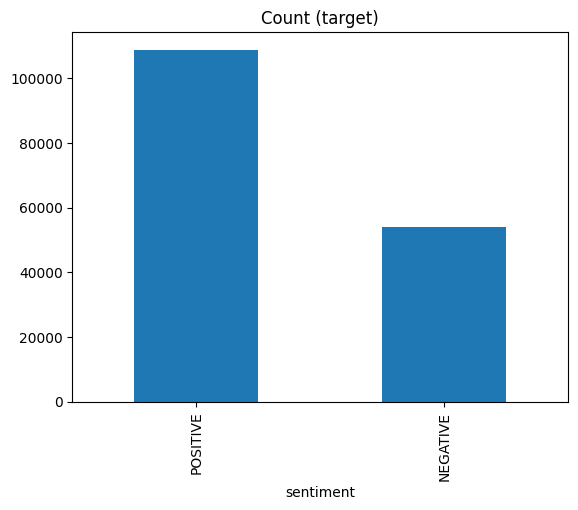

In [16]:
train['sentiment'].value_counts().plot(kind='bar', title='Count (target)')

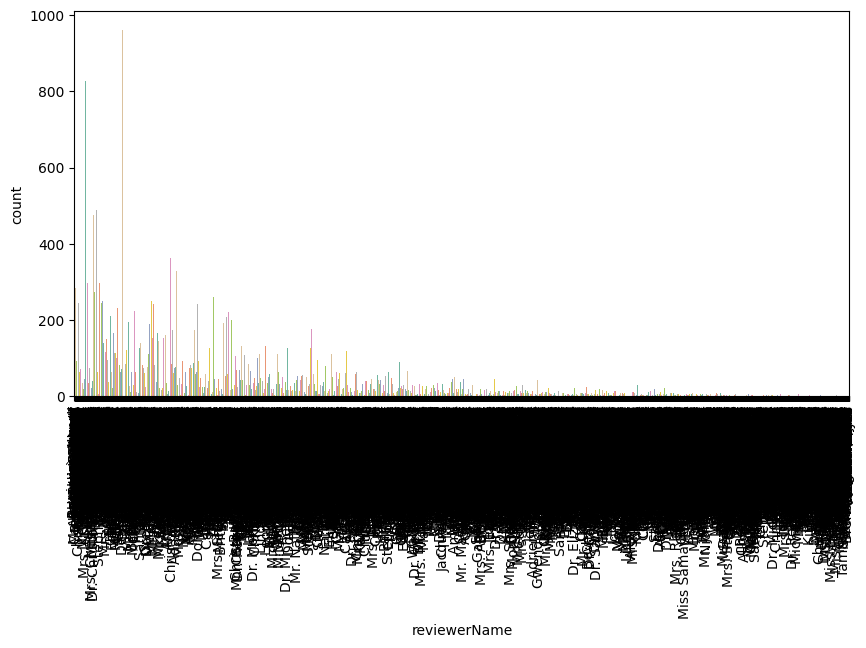

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.countplot(x='reviewerName', data=train, palette='Set2', )

plt.xticks(rotation=90)

plt.show()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [19]:
#describe the data
train.describe(include='all')

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23001 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [21]:
movies.describe(include='all')

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
count,143258,143258,73248.000000,13991,13991,30773,79420,129431.000000,132175,129400,143258,14743,23001,15917
unique,126404,126404,NaN,10,8353,12062,4726,NaN,2912,112,62208,4863,3693,551
top,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,R,['Language'],2018-09-14,2017-05-22,NaN,Drama,English,Joseph Brooks,$1.1M,Paramount Pictures,Surround
freq,367,367,NaN,7734,365,37,1232,NaN,27860,85034,4194,118,994,4075
mean,NaN,NaN,55.674967,NaN,NaN,NaN,NaN,93.708578,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,24.553648,NaN,NaN,NaN,NaN,28.129175,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,92.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,103.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#display all the duplicated rows in movies
movies[movies.duplicated()]

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
1126,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
3772,supreme_indiana_jones,Supreme Indiana Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
5048,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
7364,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
8012,holly_golightly_enthralling,Holly Golightly Enthralling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140598,cosmic_jack_torrance_ellis_redding_indiana_jones,Cosmic Jack Torrance Ellis Redding Indiana Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
140654,the_bride_hannibal_lecter_enigma_black_widow,The Bride Hannibal Lecter Enigma Black Widow,NaN,NaN,NaN,NaN,NaN,89.0,Drama,English,Raul Glover,NaN,NaN,NaN
141470,wolverine_tony_montana_wolverine,Wolverine Tony Montana Wolverine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
142468,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN


In [23]:
#the duplicate rows in train
train.drop_duplicates(inplace=True)

#the duplicate rows in movies
movies.drop_duplicates(inplace=True)

In [24]:
#the number of missing values in each column
train.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6397
sentiment                0
dtype: int64

In [25]:
#removing the rows with null values
train = train.dropna()

In [26]:
#unique values in train in all the columns
for col in train.columns:
    print(col, train[col].nunique())
    

movieid 16412
reviewerName 4471
isFrequentReviewer 2
reviewText 155071
sentiment 2


In [27]:
#the number of movieid where are there in train but not in movies
len(set(train['movieid']) - set(movies['movieid']))

0

In [28]:
#the number of common ReviewerName which are there in train but not in test
len(set(train['reviewerName']) - set(test['reviewerName']))

124

In [29]:
#common reviewerName in train and test
train_reviewerName = train['reviewerName'].unique()
test_reviewerName = test['reviewerName'].unique()
common_reviewerName = np.intersect1d(train_reviewerName, test_reviewerName)
print(len(common_reviewerName))

#find out those reviewerName in test that are not in train
test_reviewerName = test['reviewerName'].unique()
train_reviewerName = train['reviewerName'].unique()
test_reviewerName[~np.isin(test_reviewerName, train_reviewerName)]
print(len(test_reviewerName[~np.isin(test_reviewerName, train_reviewerName)]))

4347
148


In [30]:
test[test['reviewText'].isnull()]

,movieid,reviewerName,isTopCritic,reviewText
17,captain_america_annie_hall,Mrs. Lori Lopez MD,False,NaN
29,dragon_jack_torrance,John Mccullough,True,NaN
46,whirlwind_indiana_jones_captain_jack_sparrow_r...,Mr. Paul Conley PhD,False,NaN
69,princess_leia_hannibal_lecter_t-800_wondrous,Sherri Morrison,False,NaN
71,hermione_granger_crystal_gandalf_the_grey,Brianna Farley,False,NaN
...,...,...,...,...
55163,frodo_baggins_mystery_wanderer,Lindsey Chang,False,NaN
55172,kingdom_magician,Taylor Abbott,False,NaN
55195,darth_vader_captain_america_sherlock_holmes_sc...,Bryan Phillips,True,NaN
55218,escape_the_terminator_tyler_durden_astonish,Marcus Lopez DVM,False,NaN


# Data Preprocessing

**The goal of this seciton is:**
1. To seperate out the data in test where review text is missing
2. Clean  movies.csv dataset by removing features and duplicate values
3. Cleaning the reviewText column by removing the addiotional spaces
3. Imputing values in movies.csv of the selected features
4. Cleaning the training dataset
5. Concatinate features from movies dataset and training to prepare the final dataset used for training the model

<h4>Preparing seperate dataframe for test where reviewText is missing</h4>

I am going to make a seperate model for the values where the reviewText is missing, sice majority rows have reviewText which would be the primary feature of my machine learning model

In [31]:
#the rows which have null values in test
test_null = test[test['reviewText'].isnull()]

In [32]:
test_no_null = test[test['reviewText'].notnull()]

In [33]:
#find the number of reviewerName in test_null that are not in train
len(test_null[~np.isin(test_null['reviewerName'], train['reviewerName'])])

14

In [34]:
test[test['reviewText'].isnull()]

,movieid,reviewerName,isTopCritic,reviewText
17,captain_america_annie_hall,Mrs. Lori Lopez MD,False,NaN
29,dragon_jack_torrance,John Mccullough,True,NaN
46,whirlwind_indiana_jones_captain_jack_sparrow_r...,Mr. Paul Conley PhD,False,NaN
69,princess_leia_hannibal_lecter_t-800_wondrous,Sherri Morrison,False,NaN
71,hermione_granger_crystal_gandalf_the_grey,Brianna Farley,False,NaN
...,...,...,...,...
55163,frodo_baggins_mystery_wanderer,Lindsey Chang,False,NaN
55172,kingdom_magician,Taylor Abbott,False,NaN
55195,darth_vader_captain_america_sherlock_holmes_sc...,Bryan Phillips,True,NaN
55218,escape_the_terminator_tyler_durden_astonish,Marcus Lopez DVM,False,NaN


**Cleaning the additions spaces and trailing spaces in the reviewText column**


In [35]:
#cleaning the review text column by removing unwanted space and converting to lower case
train['reviewText'] = train['reviewText'].str.strip().str.lower()

#cleaning the review text column by removing unwanted space and converting to lower case
test['reviewText'] = test['reviewText'].str.strip().str.lower()

**The following function would be used to make the final y_pred file by combining the prediction from 2 models (on test with null values and one another on non null values)**

In [36]:
import numpy as np

def prepare_submission_file(test, y_pred_not_null, y_pred_null=None, y_pred_not_null_placeholder='POSITIVE'):
    test_null_indices = test.index[test['reviewText'].isnull()]
    test_no_null_indices = test.index[test['reviewText'].notnull()]
    #prepare test_null from from test_null_indices
    test_null = test.iloc[test_null_indices]

    #prepare test_no_null from test_no_null_indices
    test_no_null = test.iloc[test_no_null_indices]
    y_pred = np.array(["POSITIVE" for _ in range(len(test))])
    if y_pred_null is None:
        y_pred_not_null_placeholder = y_pred_not_null_placeholder
    else:
        y_pred[test_null_indices] = y_pred_null
    y_pred[test_no_null_indices] = y_pred_not_null
    generate_submission_file(y_pred)
    return y_pred


<h4>Cleaning the movies dataset</h4>

In [37]:
movies.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [38]:
movies = movies[['movieid', 'title', 'director', 'audienceScore', 'genre','originalLanguage']]

In [39]:
movies.isnull().sum()

movieid                 0
title                   0
director                0
audienceScore       69059
genre               10657
originalLanguage    13405
dtype: int64

**Here we will clean the movies dataset by removing the duplicate rows**

In [40]:
#temporary dataframe of duplicate movieid in movies
tempDuplicate = movies[movies.duplicated(subset=['movieid'])]

#tempEnglish dataset from tempDuplicate where originalLanguage is English
tempEnglish = tempDuplicate[tempDuplicate['originalLanguage'] == 'English']

#removing the rows mith movieid in tempEnglish from tempDuplicate
tempDuplicate = tempDuplicate[~tempDuplicate['movieid'].isin(tempEnglish['movieid'])]

#concatenating tempDuplicate and tempEnglish to get the final dataset
tempDuplicateFinal = pd.concat([tempDuplicate, tempEnglish], axis=0)

#removing all the rows from movies where movieid is in tempDuplicateFinal
movies = movies[~movies['movieid'].isin(tempDuplicateFinal['movieid'])]

#concatenating movies and tempDuplicateFinal to get the final dataset
movies = pd.concat([movies, tempDuplicateFinal], axis=0)

#keeping only the first occurence of the duplicate movieid
movies.drop_duplicates(subset=['movieid'], keep='first', inplace=True)

#the lenth of duplicate movieid in movies
len(movies[movies.duplicated(subset=['movieid'])])

0

**Merging train and test with columns from movies**

In [41]:
#adding genre, director, audienceScore and originalLanguage to train
train = pd.merge(train, movies, on='movieid', how='left')

#add genre, director, audienceScore and originalLanguage to test
test = pd.merge(test, movies, on='movieid', how='left')

In [42]:
#removing rows which have null values in genre and originalLanguage
train = train.dropna(subset=['genre', 'originalLanguage'])

<h3> Imputing train data </h3>
    
**We are imputing the audience score in train**

In [43]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

#fit and transform the imputer on audienceScore
train['audienceScore'] = imputer.fit_transform(train[['audienceScore']])

#check the number of missing values in audienceScore
train['audienceScore'].isnull().sum()

0

In [44]:
test.isnull().sum()

movieid                0
reviewerName           0
isTopCritic            0
reviewText          2510
title                  0
director               0
audienceScore       4369
genre                420
originalLanguage     614
dtype: int64

<h3>Imputing test data </h3>

**We will do the following imputation to test:**

1. Impue audience score with k-nearest neighbor
2. Impute genre with its mode
3. Impute originalLanguage with its mode

In [45]:
imputer = KNNImputer(n_neighbors=5)

#fit and transform the imputer on audienceScore
test['audienceScore'] = imputer.fit_transform(test[['audienceScore']])

#imputing genre and originalLanguage in test with mode
test['genre'].fillna(test['genre'].mode()[0], inplace=True)

test['originalLanguage'].fillna(test['originalLanguage'].mode()[0], inplace=True)

In [46]:
train_X_primary_columns = ['reviewerName', 'isFrequentReviewer', 'reviewText','director', 'audienceScore', 'genre','originalLanguage']

In [47]:
train.isnull().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
title                 0
director              0
audienceScore         0
genre                 0
originalLanguage      0
dtype: int64

In [48]:
test.isnull().sum()
test.columns = ['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText', 'title',
       'director', 'audienceScore', 'originalLanguage', 'genre']

**Preparing test with null and without null reviewText so different machine learning models could be run on it**

In [49]:
test_with_null = test[test['reviewText'].isnull()]
test_without_null = test[~test['reviewText'].isnull()]

In [50]:
test_with_null = test_with_null.drop('reviewText', axis=1)

**Preparing genre column by binarizing it**

In [51]:
import re
delimiters = r",|&"
genre = [re.split(delimiters, x) for x in train['genre']]

train.drop('genre', inplace = True, axis =1)

train['genre'] = genre

genre = [re.split(delimiters, x) for x in test['genre']]

test.drop('genre', inplace = True, axis =1)

test['genre'] = genre



In [52]:
#import multi label binarizer
from sklearn.preprocessing import MultiLabelBinarizer

# Transforming the 'genre' column separately
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(train['genre'])

# Creating a dataframe of the encoded columns
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

#reset the index of the original dataframe
train.reset_index(drop=True, inplace=True)
genre_encoded_df.reset_index(drop=True, inplace=True)

#joining the original dataframe and the encoded dataframe
train= train.join(genre_encoded_df)

#Dropping the 'genre' column
train.drop('genre', axis=1, inplace=True)

In [53]:
#apply to test
genre_encoded = mlb.transform(test['genre'])

# Creating a dataframe of the encoded columns
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

#reset the index of the original dataframe
test.reset_index(drop=True, inplace=True)

genre_encoded_df.reset_index(drop=True, inplace=True)

#joining the original dataframe and the encoded dataframe
test= test.join(genre_encoded_df)

#Dropping the 'genre' column
test.drop('genre', axis=1, inplace=True)

c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\preprocessing\_label.py:878: UserWarning: unknown class(es) ['Afrikaans', 'Albanian', 'Amharic', 'Arabic', 'Aramaic', 'Armenian', 'Bambara', 'Bangla', 'Bosnian', 'Bulgarian', 'Catalan', 'Chinese', 'Croatian', 'Czech', 'Danish', 'Dutch', 'Dzongkha', 'English', 'English (Australia)', 'English (United Kingdom)', 'Estonian', 'Filipino', 'Finnish', 'French', 'French (Canada)', 'French (France)', 'Galician', 'Georgian', 'German', 'Greek', 'Gujarati', 'Hebrew', 'Hindi', 'Hungarian', 'Icelandic', 'Indonesian', 'Inuktitut', 'Italian', 'Japanese', 'Kalaallisut', 'Kannada', 'Khmer', 'Korean', 'Kurdish', 'Lao', 'Lingala', 'Lithuanian', 'Luxembourgish', 'Macedonian', 'Malay', 'Malayalam', 'Maltese', 'Maori', 'Marathi', 'Mongolian', 'Nepali', 'Norwegian', 'Pashto', 'Persian', 'Polish', 'Portuguese', 'Portuguese (Brazil)', 'Punjabi', 'Romanian', 'Romany', 'Russian', 'Serbian', 'Somali', 'Spanish', 'Spanish (

In [54]:
test_no_null = test[test['reviewText'].notnull()]
test_null = test[test['reviewText'].isnull()]

In [55]:
genre_columns = genre_encoded_df.columns
train_columns = ['reviewText', 'isFrequentReviewer', 'reviewerName']
movies_columns = ['director','originalLanguage','audienceScore']
#comine all the columns in "all_columns"
all_columns = train_columns + list(genre_columns) + movies_columns
all_columns_without_reviewText = ['isFrequentReviewer', 'reviewerName'] + list(genre_columns) + movies_columns


<h3>We have successfully used features from movies.csv to prepare our training dataset</h3>

<h3> We will further process data right inside the pipelines so we could easily change the preprocessing step used on feature to improve model performance</h3>

In [56]:
#split the data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train[all_columns], train['sentiment'], test_size=0.2, random_state=42)

<h1>Naive Bayes Model</h1>

**We will run it on X_train and check the performace, if the performace is good, we would run it on test**

<h4>

<h4>Naive Bayes on X_train</h4>

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('cv', CountVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8, stop_words='english'), 'reviewText'),
], remainder='passthrough', n_jobs=-1)

pipeline = Pipeline([
    ('col', column_transformer),
    ('nb', MultinomialNB()),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train)

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
accuracy_score(y_val, y_pred)

[Pipeline] ............... (step 1 of 2) Processing col, total=  44.9s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 15.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ................ (step 2 of 2) Processing nb, total=   1.2s


0.8018864856074158

<h4> Evaluating the naive bayes model</h4>

In [87]:
# Accuracy score on X_val
accuracy_score(y_val, y_pred)

0.8018864856074158

c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


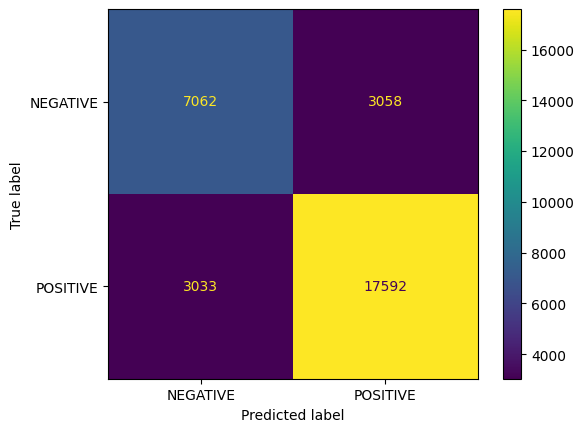

In [88]:
#import display confustion matrix
from sklearn.metrics import plot_confusion_matrix

#plot the confusion matrix
plot_confusion_matrix(pipeline, X_val, y_val, values_format='d', display_labels=['NEGATIVE', 'POSITIVE'])

<h4>Naive Bayes on test without null values in reviewText</h4>

In [89]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('cv', CountVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8, stop_words='english'), 'reviewText'),
], remainder='passthrough', n_jobs=-1)

pipeline = Pipeline([
    ('col', column_transformer),
    ('nb', MultinomialNB()),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(train[all_columns], train['sentiment'])

# Predict on X_val
y_pred = pipeline.predict(test_no_null[all_columns])

[Pipeline] ............... (step 1 of 2) Processing col, total=  21.8s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 20.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ................ (step 2 of 2) Processing nb, total=   1.7s


<h4>Naive Bayes on test with null values in reviewText</h4>

In [90]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
], remainder='passthrough', n_jobs=-1)

pipeline = Pipeline([
    ('col', column_transformer),
    ('nb', MultinomialNB()),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(train[all_columns_without_reviewText], train['sentiment'])

# Predict on X_val
y_pred_null = pipeline.predict(test_null[all_columns_without_reviewText])

[Pipeline] ............... (step 1 of 2) Processing col, total=   1.2s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 3.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ................ (step 2 of 2) Processing nb, total=   0.8s


In [142]:
prepare_submission_file(test, y_pred_not_null=y_pred, y_pred_null=y_pred_null)

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'POSITIVE',
       'NEGATIVE'], dtype='<U8')

<h1>Logiistic Regression Model</h1>

[Pipeline] ............... (step 1 of 2) Processing col, total=  11.3s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 5.84s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ................ (step 2 of 2) Processing lr, total= 2.3min
0.8134656041632786


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


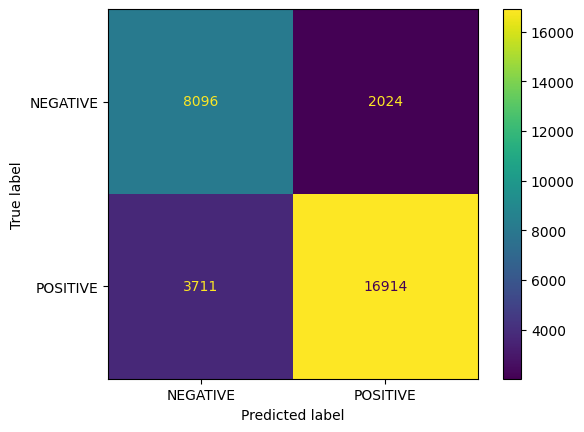

In [91]:
#apply the logistic regression model unsing pipeline and column transformer
from sklearn.linear_model import LogisticRegression

#feature union for reviewText which has CountVectorizer and svd
from sklearn.decomposition import TruncatedSVD


cv_pipe = Pipeline([
    ('cv', CountVectorizer()),
], verbose=True, memory='cache_folder')


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('cv_pipe', cv_pipe, 'reviewText'),
], remainder='passthrough', n_jobs=-1)

pipeline = Pipeline([
    ('col', column_transformer),
    ('lr', LogisticRegression(max_iter=2000, random_state=42, n_jobs=-1, C=0.1, penalty='l2', solver='lbfgs')),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train)

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val, y_pred))

#plot the confusion matrix
plot_confusion_matrix(pipeline, X_val, y_val, values_format='d', display_labels=['NEGATIVE', 'POSITIVE'])


<h4>Using randomized search/grid seach cv to find the best parameters for logistic regression</h4>

**In this sesion we are diong the following:**
1. Using randomized search cv to find the best parameters for logistic regression
2. trying out different preprocessing steps to see if it improves the performace of the model
3. Using the best parameters to train the model on X_train
4. using the best parameters to train the model on test without null values in reviewText


In [201]:
#apply the logistic regression model unsing pipeline and column transformer
from sklearn.linear_model import LogisticRegression
#feature union for reviewText which has CountVectorizer and svd
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV

cv_pipe = Pipeline([
    ('cv', CountVectorizer()),
], verbose=True, memory='cache_folder')


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('cv_pipe', cv_pipe, 'reviewText'),
], remainder='passthrough', n_jobs=-1)

pipeline = Pipeline([
    ('col', column_transformer),
    ('lr', LogisticRegression()),
], verbose=True, memory='cache_folder')

#make a radamized search cv
param_grid = [{
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l2'],
    'lr__solver': ['liblinear', 'lbfgs', 'sag'],
},
{
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1'],
    'lr__solver': ['liblinear', 'saga'],
}
]

#make a randomized search cv
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5, verbose=10, n_jobs=-1, random_state=42)

#fit the randomized search cv on X_train and y_train
random_search.fit(X_train, y_train)

# Predict on X_val
y_pred = random_search.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Pipeline] ................ (step 2 of 2) Processing lr, total=  13.8s
0.8248495690356156


In [205]:
#print the best parameters
print(random_search.best_params_)

{'lr__solver': 'liblinear', 'lr__penalty': 'l1', 'lr__C': 1}


In [202]:
#print the best parameters
print(random_search.best_params_)

{'lr__solver': 'liblinear', 'lr__penalty': 'l1', 'lr__C': 1}


<h4>Logistic Regression on test without null values</h4>

In [206]:
##apply the logistic regression model unsing pipeline and column transformer on the test data without null values
cv_pipe = Pipeline([
    ('cv', CountVectorizer()),
], verbose=True, memory='cache_folder')

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('cv_pipe', cv_pipe, 'reviewText'),
], remainder='passthrough', n_jobs=-1)

pipeline = Pipeline([
    ('col', column_transformer),
    ('lr', LogisticRegression(solver='liblinear', penalty='l1', C=1)),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on train data
pipeline.fit(train[all_columns], train['sentiment'])

# Predict on test data
y_pred = pipeline.predict(test_no_null[all_columns])


[Pipeline] ................ (step 2 of 2) Processing lr, total=   7.8s


<h4>Logistic Regression on test with null values</h4>

In [208]:
##apply the logistic regression model unsing pipeline and column transformer on the test data with null values

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
], remainder='passthrough', n_jobs=-1)

pipeline = Pipeline([
    ('col', column_transformer),
    ('lr', LogisticRegression(max_iter=2000, random_state=42, n_jobs=-1, C=0.1, penalty='l2', solver='lbfgs')),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on train data
pipeline.fit(train[all_columns_without_reviewText], train['sentiment'])

# Predict on test data
y_pred_null = pipeline.predict(test_null[all_columns_without_reviewText])

prepare_submission_file(test, y_pred_not_null=y_pred, y_pred_null=y_pred_null)

[Pipeline] ................ (step 2 of 2) Processing lr, total=  18.9s


array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'POSITIVE',
       'NEGATIVE'], dtype='<U8')

# Decision Tree Model

In [212]:
#apply mlp classifier on the X_train and y_train data using pipeline and column transformer
#import cart
from sklearn.tree import DecisionTreeClassifier


cv_pipe = Pipeline([
    ('cv', CountVectorizer()),
], verbose=True, memory='cache_folder')

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('cv_pipe', cv_pipe, 'reviewText'),
], remainder='passthrough', n_jobs=-1)

pipeline = Pipeline([
    ('col', column_transformer),
    #apply cart
    ('cart', DecisionTreeClassifier(random_state=42, max_depth=30, min_samples_split=10, min_samples_leaf=5, )),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train)

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val, y_pred))







[Pipeline] .............. (step 2 of 2) Processing cart, total=  59.7s
0.7085379736542528


<h4>Since the decision tree model is not performing well, we will try to improve it by using grid search cv/randomized search cv to find the best parameters</h4>

In [267]:
#apply grid search cv on the X_train and y_train data using pipeline and column transformer
#import cart
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv_pipe = Pipeline([
    ('cv', TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=5, max_df=0.8)),
], verbose=True, memory='cache_folder')

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('cv_pipe', cv_pipe, 'reviewText'),
], remainder='passthrough', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    #apply cart
    ('cart', DecisionTreeClassifier()),
], verbose=True, memory='cache_folder')

#make a grid search cv
param_grid = [{
    'cart__max_depth': [40, 50, 60, 70, 80],
    'cart__min_samples_split': [5, 10, 15, 20],
    'cart__min_samples_leaf': [5, 10, 15, 20],
    'cart__criterion': ['gini', 'entropy'],
}]

#make a grid search cv
random_search = RandomizedSearchCV(pipeline, param_grid, cv=2, verbose=3, n_jobs=-1, n_iter=10, random_state=42)

#fit the grid search cv on X_train and y_train
random_search.fit(X_train, y_train)

# Predict on X_val
y_pred = random_search.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val, y_pred))




Fitting 2 folds for each of 10 candidates, totalling 20 fits
[Pipeline] ............... (step 1 of 2) Processing col, total=   7.4s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 7.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] .............. (step 2 of 2) Processing cart, total=  42.8s
0.7194340543177753


<h4>It is taking a long time to evaluate decision tree paramerters, so we will try to reduce the number of features using SVD</h4>

<h1>Dimensionality Reduction using SVD</h1>

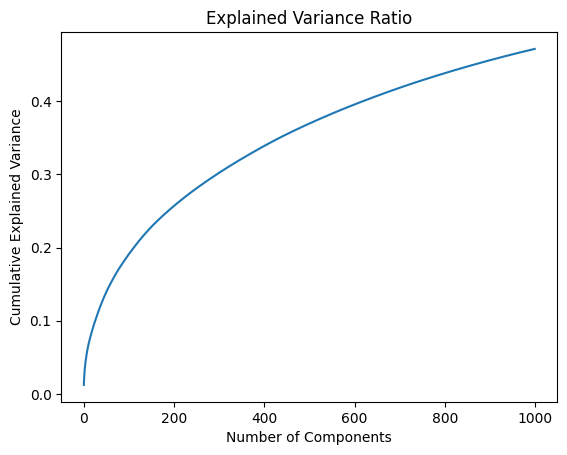

In [259]:
#apply dimensionality reduction with decion trees classfier and plot variance vs number of components
#import svd
from sklearn.decomposition import TruncatedSVD
#import cart
from sklearn.tree import DecisionTreeClassifier

# Apply SVD
svd = TruncatedSVD(n_components=1000)

column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8, stop_words='english'), 'reviewText'),
], remainder='drop', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
])

pipeline.fit(X_train)

# Transform the training data
X_transformed = svd.fit_transform(pipeline.transform(X_train))

# Calculate explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()




In [270]:
X_reviewText_svd = X_transformed

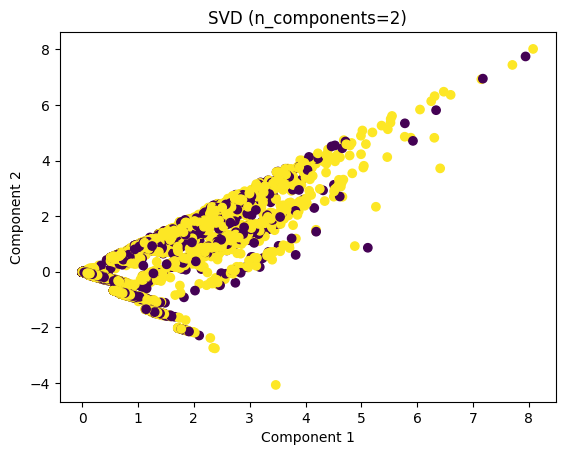

In [274]:
#transfrom y_train to 1 and 0
y_train_t = y_train.map({'POSITIVE': 1, 'NEGATIVE': 0})
#plot the top 3 components
plt.scatter(X_reviewText_svd[:, 0], X_reviewText_svd[:, 1], c=y_train_t)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVD (n_components=2)')
plt.show()

**We will use the reduced features later for algorithms that will take a long time to run**

<h4>We learned the following from applying decion tree on the dataset:</h4>

1. 1000 components are capturing less than 0.5 variance
2. Since Decision tree algorithm's accuracy was already low, we will not use Decion tree model for prediction

<h1>Random Forest Model</h1>

In [266]:
#apply random forest classifier on the X_train and y_train data using pipeline and column transformer
#import random forest
from sklearn.ensemble import RandomForestClassifier
#import select k best
from sklearn.feature_selection import SelectKBest, chi2

column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8, stop_words='english'), 'reviewText'),
], remainder='drop', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    #apply random forest
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=40, min_samples_split=5, min_samples_leaf=5, n_jobs=-1)),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train)

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val, y_pred))

[Pipeline] ................ (step 2 of 2) Processing rf, total=   6.8s
0.672564644657668


random forest model has really bad performace, so we will try to improve it by using grid search cv/randomized search cv to find the best parameters

<h1>Ada and XGBoost Model</h1>

In [288]:
#apply xg boost classifier on the X_train and y_train data using pipeline and column transformer
#import xg boost
from xgboost import XGBClassifier

column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8, stop_words='english'), 'reviewText'),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
], remainder='drop', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    #apply xg boost
    ('xgb', XGBClassifier(n_jobs=-1, random_state=42, max_depth=100, n_estimators=150, learning_rate=0.1)),

], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train.map({'POSITIVE': 1, 'NEGATIVE': 0}))

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val.map({'POSITIVE': 1, 'NEGATIVE': 0}), y_pred))


[Pipeline] ............... (step 2 of 2) Processing xgb, total= 3.3min
0.7882582533745325


In [292]:
#apply ada boost classifier on the X_train and y_train data using pipeline and column transformer
#import ada boost

from sklearn.ensemble import AdaBoostClassifier

column_transformer = ColumnTransformer([
    ('tfid', TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8, stop_words='english'), 'reviewText'),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
], remainder='drop', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    #apply ada boost
    ('ada', AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.1)),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train.map({'POSITIVE': 1, 'NEGATIVE': 0}))

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val.map({'POSITIVE': 1, 'NEGATIVE': 0}), y_pred))

[Pipeline] ............... (step 1 of 2) Processing col, total=   6.3s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 5.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............... (step 2 of 2) Processing ada, total=  43.4s
0.6811514067328021


<h1>Support Vector Machine Model</h1>

In [76]:
#apply svm classifier on the X_train and y_train data using pipeline and column transformer
#import linear svc
from sklearn.svm import LinearSVC
#import standard scaler
from sklearn.preprocessing import StandardScaler
#import select k best
from sklearn.feature_selection import SelectKBest, chi2

column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(), 'reviewText'),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('sc', StandardScaler(), ['audienceScore']),
], remainder='passthrough', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    #apply linear svc
    ('svc', LinearSVC(random_state=42, C=0.1, penalty='l2', loss='hinge', max_iter=2000)),
], verbose=True, memory='cache_folder')


# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train.map({'POSITIVE': 1, 'NEGATIVE': 0}))

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val.map({'POSITIVE': 1, 'NEGATIVE': 0}), y_pred))

[Pipeline] ............... (step 2 of 2) Processing svc, total=   3.8s
0.8263457472759799


In [162]:
#apply sgd classifier on the X_train and y_train data using pipeline and column transformer
#import sgd classifier
from sklearn.linear_model import SGDClassifier
#import standard scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(), 'reviewText'),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('sc', MinMaxScaler(), ['audienceScore']),
], remainder='passthrough', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    #select k best
    ('skb', SelectKBest(chi2, k=60000)),
    #apply sgd classifier
    ('sgd', SGDClassifier(random_state=42, loss='hinge', penalty='l2', alpha=0.0001, max_iter=1000, tol=1e-3)),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train.map({'POSITIVE': 1, 'NEGATIVE': 0}))

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val.map({'POSITIVE': 1, 'NEGATIVE': 0}), y_pred))



[Pipeline] ............... (step 3 of 3) Processing sgd, total=   1.1s
0.827093836396162


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


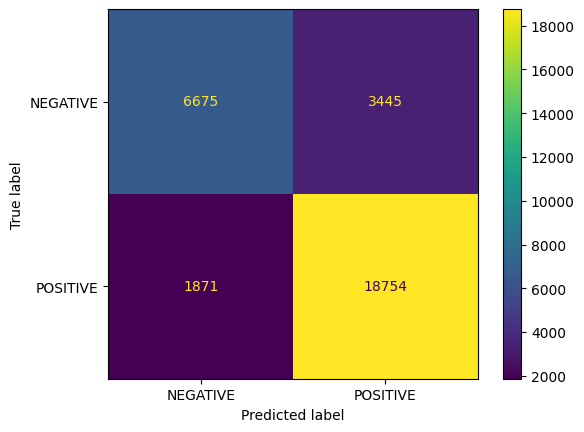

In [163]:
#import display confustion matrix
from sklearn.metrics import plot_confusion_matrix
#plot the confusion matrix
plot_confusion_matrix(pipeline, X_val, y_val.map({'POSITIVE': 1, 'NEGATIVE': 0}), values_format='d', display_labels=['NEGATIVE', 'POSITIVE'])

In [112]:

#apply knn classifier on the X_train and y_train data using pipeline and column transformer
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(), 'reviewText'),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
], remainder='passthrough', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    #select k best
    ('kbest', SelectKBest(chi2, k=20000)),
    #apply knn classifier
    ('knn', KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
], verbose=True, memory='cache_folder')

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train.map({'POSITIVE': 1, 'NEGATIVE': 0}))

# Predict on X_val
y_pred = pipeline.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val.map({'POSITIVE': 1, 'NEGATIVE': 0}), y_pred))

[Pipeline] ............. (step 2 of 3) Processing kbest, total=   0.2s
[Pipeline] ............... (step 3 of 3) Processing knn, total=   0.0s
0.6835583021629533


<h1>Feature selection using SelectKBest</h1>

**finding the the shape of the dataset after applying count vectorizer to get an estimate of the number of features to be reduced using feature selection**


In [ ]:
#finding the the shape of the dataset after applying count vectorizer to get an estimate of the number of features to be reduced using feature selection
column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(), 'reviewText'),
], remainder='drop', n_jobs=-1, verbose=True)

column_transformer.fit(X_train)

# Transform X_train
X_train_transformed = column_transformer.transform(X_train)

print(X_train_transformed.shape)

In [258]:
#import feature selection
from sklearn.feature_selection import SelectKBest, chi2
#import grid search cv
from sklearn.model_selection import GridSearchCV

#apply feature selection on the X_train and y_train

column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(), 'reviewText'),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName'])
], remainder='passthrough', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    ('kbest', SelectKBest(chi2, k=20000)),
    ('lr', LogisticRegression()),
], verbose=True, memory='cache_folder')

#make param grid
param_grid = [{
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l2'],
    'col__cv__stop_words': ['english', None],
    'kbest__k': [10000, 20000, 30000, 40000, 50000],
    'lr_max_iter': [2000, 3000, 4000, 5000],
},
]

#make a randomized search cv
random_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=3, n_jobs=-1, pre_dispatch=2)

#fit the grid search cv on X_train and y_train
random_search.fit(X_train, y_train)

# Predict on X_val
y_pred = random_search.predict(X_val)

# Accuracy score on X_val
print(accuracy_score(y_val, y_pred))


Fitting 2 folds for each of 90 candidates, totalling 180 fits
[Pipeline] ............... (step 1 of 3) Processing col, total=   3.9s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 2.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............. (step 2 of 3) Processing kbest, total=   0.6s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.0s
0.7827614246218897


In [116]:
#use recursive feature elimination to select the best features
#import recursive feature elimination
from sklearn.feature_selection import RFE

column_transformer = ColumnTransformer([
    ('cv', CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=5, max_df=0.8), 'reviewText'),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['director', 'originalLanguage', 'reviewerName']),
    ('sc', StandardScaler(), ['audienceScore'])
], remainder='passthrough', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
])

# Fitting the pipeline on X_train and y_train
pipeline.fit(X_train, y_train)

#transform X_train
X_train_transformed = pipeline.transform(X_train)

l_svc = LinearSVC(random_state=42, C=0.1, penalty='l2', loss='hinge', max_iter=2000)

l_svc.fit(X_train_transformed, y_train)

# Predict on X_val
y_pred = l_svc.predict(pipeline.transform(X_val))

# Accuracy score on X_val
print(accuracy_score(y_val, y_pred))



Fitting estimator with 56668 features.
Fitting estimator with 56667 features.
Fitting estimator with 56666 features.
Fitting estimator with 56665 features.
Fitting estimator with 56664 features.
Fitting estimator with 56663 features.
Fitting estimator with 56662 features.
Fitting estimator with 56661 features.
Fitting estimator with 56660 features.
Fitting estimator with 56659 features.
Fitting estimator with 56658 features.
Fitting estimator with 56657 features.
Fitting estimator with 56656 features.
Fitting estimator with 56655 features.
Fitting estimator with 56654 features.
Fitting estimator with 56653 features.
Fitting estimator with 56652 features.
Fitting estimator with 56651 features.
Fitting estimator with 56650 features.
Fitting estimator with 56649 features.
Fitting estimator with 56648 features.
Fitting estimator with 56647 features.
Fitting estimator with 56646 features.
Fitting estimator with 56645 features.
Fitting estimator with 56644 features.
Fitting estimator with 56

KeyboardInterrupt: 

<h1>Final Model</h1>

<h4>Fitting the model that has the maximum accuracy rate</h4>

Since we have found the best performing algorithms are logistic regression, SGDClassfier with hinge loss and naive bayes we will use them together in a voting classfier to build our final model

In [95]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Separate column transformers for each feature
cv_transformer = CountVectorizer()
ohe_transformer = OneHotEncoder(handle_unknown='ignore')
#min max scaler
mm_transformer = MinMaxScaler()

column_transformer = ColumnTransformer([
    ('cv', cv_transformer, 'reviewText'),
    ('ohe_director', ohe_transformer, ['director']),
    ('ohe_reviewer', ohe_transformer, ['reviewerName']),
    ('ohe_language', ohe_transformer, ['originalLanguage']),
    ('mm', mm_transformer, ['audienceScore'])
], remainder='passthrough', verbose=True)


#create the naive bayes classifier
nb = MultinomialNB( )

sgd = SGDClassifier(random_state=42, loss='hinge', penalty='l2', alpha=0.0001, max_iter=1000, tol=1e-3)

#create the logistic regression classifier
lr = LogisticRegression(solver='liblinear', penalty='l1', C=1)

# Create individual classifiers for the VotingClassifier
classifiers = [
    ('nb', nb),
    ('lr', lr),
    ('sgd', sgd),
]

#create the stacking classifier
voting_classifier = VotingClassifier(classifiers, voting='hard', n_jobs=-1)
pipeline = Pipeline([
    ('col', column_transformer),
    ('voting_classifier', voting_classifier),  
], verbose=True, memory='cache_folder')

pipeline.fit(train[all_columns], train['sentiment'])


[ColumnTransformer] ............ (1 of 6) Processing cv, total=   4.9s
[ColumnTransformer] .. (2 of 6) Processing ohe_director, total=   0.1s
[ColumnTransformer] .. (3 of 6) Processing ohe_reviewer, total=   0.1s
[ColumnTransformer] .. (4 of 6) Processing ohe_language, total=   0.0s
[ColumnTransformer] ............ (5 of 6) Processing mm, total=   0.0s
[ColumnTransformer] ..... (6 of 6) Processing remainder, total=   0.0s
[Pipeline] ............... (step 1 of 3) Processing col, total=   5.7s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 4.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............... (step 2 of 3) Processing skb, total=   0.8s


c:\Users\kanis\development\tds\image classification with python\env\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] . (step 3 of 3) Processing voting_classifier, total=  27.5s


Pipeline(memory='cache_folder',
         steps=[('col',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cv', CountVectorizer(),
                                                  'reviewText'),
                                                 ('ohe_director',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['director']),
                                                 ('ohe_reviewer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['reviewerName']),
                                                 ('ohe_language',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['originalLanguage']),
                                                 ('mm', MinMaxScaler(),
                                                  ['audienceScore'])],
                                   verbose=True)),
                ('skb',
                 SelectKBest(k=40000,
                             score_func=<function chi2 at 0x00000163BF2A9280>)),
                ('voting_classifier',
                 VotingClassifier(estimators=[('nb', MultinomialNB()),
                                              ('lr',
                                               LogisticRegression(C=1,
                                                                  penalty='l1',
                                                                  solver='liblinear')),
                                              ('sgd',
                                               SGDClassifier(random_state=42))],
                                  n_jobs=-1))],
         verbose=True)

<h3>Predicting on test values without null values in reviewText</h3>

In [96]:
#predict on test without null values
y_pred = pipeline.predict(test_no_null[all_columns])

<h4>Preparing the model for predicting on test values with null values in reviewText</h4>

In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Separate column transformers for each feature

ohe_transformer = OneHotEncoder(handle_unknown='ignore')
#min max scaler
mm_transformer = MinMaxScaler()

column_transformer = ColumnTransformer([
    ('ohe_director', ohe_transformer, ['director']),
    ('ohe_reviewer', ohe_transformer, ['reviewerName']),
    ('ohe_language', ohe_transformer, ['originalLanguage']),
    ('mm', mm_transformer, ['audienceScore'])
], remainder='passthrough', verbose=True)


#create the naive bayes classifier
nb = MultinomialNB( )

sgd = SGDClassifier(random_state=42, loss='hinge', penalty='l2', alpha=0.0001, max_iter=1000, tol=1e-3)

#create the logistic regression classifier
lr = LogisticRegression(solver='liblinear', penalty='l1', C=1)

# Create individual classifiers for the VotingClassifier
classifiers = [
    ('nb', nb),
    ('sgd', sgd),
    ('lr', lr)
]

#create the voting classifier
voting_classifier = VotingClassifier(classifiers, voting='hard', n_jobs=-1, verbose=True)

pipeline = Pipeline([
    ('col', column_transformer),
    ('voting_classifier', voting_classifier),  
], verbose=True, memory='cache_folder')

pipeline.fit(train[all_columns_without_reviewText], train['sentiment'])

# Predict on test data
y_pred_null = pipeline.predict(test_null[all_columns_without_reviewText])


[Pipeline] . (step 2 of 2) Processing voting_classifier, total=  27.8s


In [98]:
prepare_submission_file(test, y_pred_not_null=y_pred, y_pred_null=y_pred_null)

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'POSITIVE',
       'NEGATIVE'], dtype='<U8')